## **Handling Overfitting In Deep Neural Network**

This is a dataset that describes sonar chirp returns bouncing off different services. The 60 input variables are the strength of the returns at different angles. It is a **binary classification problem** that requires a model to differentiate rocks from metal cylinders.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('sonar.csv',header=None, skiprows=1)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
20,0.0473,0.0509,0.0819,0.1252,0.1783,0.3070,0.3008,0.2362,0.3830,0.3759,...,0.0193,0.0118,0.0064,0.0042,0.0054,0.0049,0.0082,0.0028,0.0027,Rock
124,0.0388,0.0324,0.0688,0.0898,0.1267,0.1515,0.2134,0.2613,0.2832,0.2718,...,0.0255,0.0071,0.0263,0.0079,0.0111,0.0107,0.0068,0.0097,0.0067,Mine
63,0.0067,0.0096,0.0024,0.0058,0.0197,0.0618,0.0432,0.0951,0.0836,0.1180,...,0.0048,0.0023,0.0020,0.0040,0.0019,0.0034,0.0034,0.0051,0.0031,Rock
58,0.0225,0.0019,0.0075,0.0097,0.0445,0.0906,0.0889,0.0655,0.1624,0.1452,...,0.0034,0.0129,0.0100,0.0044,0.0057,0.0030,0.0035,0.0021,0.0027,Rock
28,0.0100,0.0275,0.0190,0.0371,0.0416,0.0201,0.0314,0.0651,0.1896,0.2668,...,0.0088,0.0104,0.0036,0.0088,0.0047,0.0117,0.0020,0.0091,0.0058,Rock


In [3]:
X = df.drop(60, axis=1)
y = df[60]
y.head()

0    Rock
1    Rock
2    Rock
3    Rock
4    Rock
Name: 60, dtype: object

In [4]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)
_,x_val,_,y_val = train_test_split(X_test,y_test,test_size=0.25,random_state=1)

## **Using Deep Learning Model**

In [7]:
import tensorflow as tf
from tensorflow import keras

In [8]:
model = keras.Sequential([
    keras.layers.Dense(80, input_dim=60, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

H = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.3)

Epoch 1/100
14/14 [==============================] - 1s 18ms/step - loss: 0.6925 - accuracy: 0.5321 - val_loss: 0.6645 - val_accuracy: 0.5745
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6694 - accuracy: 0.5872 - val_loss: 0.6532 - val_accuracy: 0.5745
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6510 - accuracy: 0.6055 - val_loss: 0.6348 - val_accuracy: 0.7447
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6441 - accuracy: 0.6514 - val_loss: 0.6117 - val_accuracy: 0.6170
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6169 - accuracy: 0.7156 - val_loss: 0.5865 - val_accuracy: 0.7872
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.5881 - accuracy: 0.7156 - val_loss: 0.5770 - val_accuracy: 0.7021
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 0.5628 - accuracy: 0.7339 - val_loss: 0.5371 - val_accuracy: 0.8298
Epoch 8/100


In [9]:
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: ',acc*100)

2/2 [==============================] - 0s 2ms/step - loss: 1.4452 - accuracy: 0.8077
Test Accuracy:  80.7692289352417


In [10]:
loss, acc = model.evaluate(X_train,y_train)
print('Training Accuracy: ',acc*100)

5/5 [==============================] - 0s 2ms/step - loss: 0.5138 - accuracy: 0.9487
Training Accuracy:  94.87179517745972


Our model is overfitting

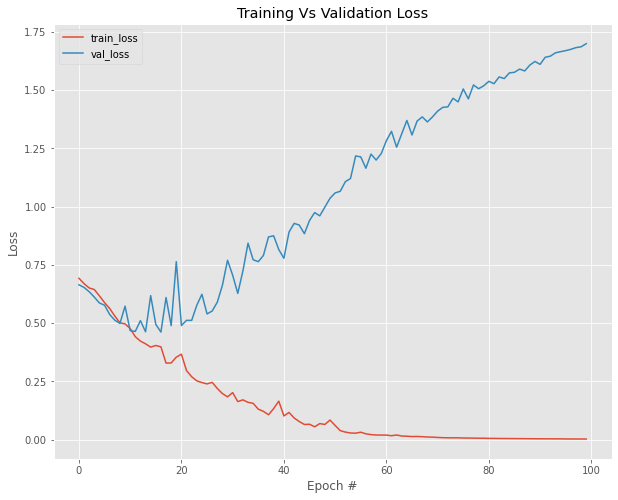

In [11]:
import matplotlib.pyplot as plt

epochs = np.arange(0,  len(H.history['loss']))
plt.figure(figsize=(10,8))
plt.style.use('ggplot')

#plot training and validation loss
plt.style.use('ggplot')
plt.plot(epochs, H.history['loss'], label='train_loss')
plt.plot(epochs, H.history['val_loss'], label='val_loss')
plt.title('Training Vs Validation Loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

## **Fixing overfitting**

There are many techniques that we can employ to fix the problem of overfitting. Below are the most common and recommended ones: <br>
1. Simplify the complexity of the model <br>
2. L2 Regularization <br>
3. Drop Out <br>
4. Early Stopping <br>
5. Data Augmentation

#### **1. Simplify the complexity of the model**

The first step when dealing with overfitting is to decrease the complexity of the model. To decrease it, we can simply remove layers or reduce the number of neurons to make the network smaller. While doing this, it is important ot calculate the input and output dimensions of the various layers involved in the neural network. There is no general rule on how much to remove or how large you network should be. But, if your neural network is overfitting, try making it smaller.

#### **2. L2 Regularization**

L2 regularization introduces a new cost function by adding a penalty term to a loss function called an L2 weight penalty. <br>

It is also known as weight decay as it pushes the values of the weights to zero (but not zero).

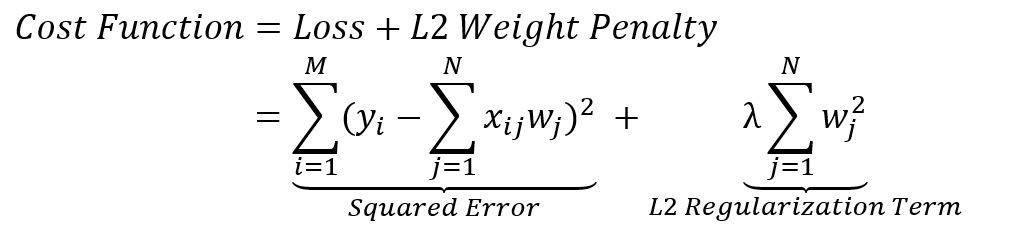

#### **3. Drop out**

Regularization techniques prevent the model from overfitting by modifying the cost function. Drop out on the other hand, prevents overfitting by modifying the network itself. Every neuron apart from the ones in the output layer is assigned the probability p of being temporarily ignored from calculations. p is also called dropout rate and is usually initialized to 0.5. Then, as each iteration progresses, the neurons in each layer with the highest probability get dropped. This results in creating a smaller network with each epoch. Since in each iteration, a random input value can be eliminated, the network can be eliminated, the network tries to balance the risk and not to favour any ofthe features and reduces bias and noise.

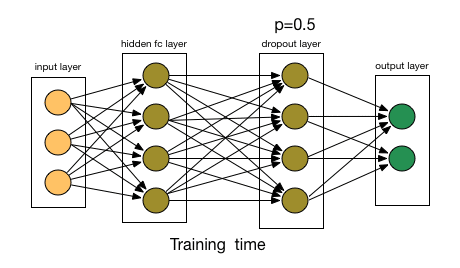

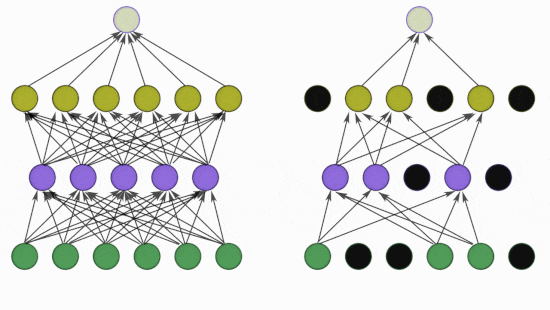

## **Adding L2 Regularization from Keras**

In [42]:
kernel_regularizer = tf.keras.regularizers.l2(0.1)

model = keras.Sequential([
    keras.layers.Dense(80, input_dim=60, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

H = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.3)

Epoch 1/100
14/14 [==============================] - 2s 24ms/step - loss: 7.0287 - accuracy: 0.4587 - val_loss: 6.3336 - val_accuracy: 0.4894
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 5.8237 - accuracy: 0.5780 - val_loss: 5.2387 - val_accuracy: 0.6170
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 4.8158 - accuracy: 0.6239 - val_loss: 4.3272 - val_accuracy: 0.6170
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 3.9867 - accuracy: 0.6972 - val_loss: 3.5809 - val_accuracy: 0.7660
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 3.3093 - accuracy: 0.6514 - val_loss: 2.9777 - val_accuracy: 0.7234
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 2.7583 - accuracy: 0.6697 - val_loss: 2.4937 - val_accuracy: 0.6596
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 2.3203 - accuracy: 0.6697 - val_loss: 2.1065 - val_accuracy: 0.7872
Epoch 8/100


In [43]:
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: ',acc*100)

2/2 [==============================] - 0s 4ms/step - loss: 0.6888 - accuracy: 0.7692
Test Accuracy:  76.92307829856873


In [44]:
loss, acc = model.evaluate(X_train,y_train)
print('Test Accuracy: ',acc*100)

5/5 [==============================] - 0s 1ms/step - loss: 0.3009 - accuracy: 0.9487
Test Accuracy:  94.87179517745972


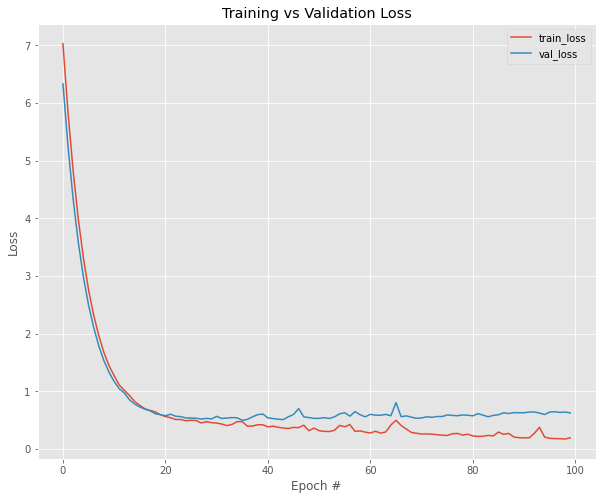

In [45]:
import matplotlib.pyplot as plt

epochs = np.arange( 0, len(H.history['loss']))
plt.figure(figsize=(10,8))
plt.style.use('ggplot')

#plotting training and validation loss
plt.style.use('ggplot')
plt.plot(epochs, H.history['loss'], label='train_loss')
plt.plot(epochs, H.history['val_loss'], label='val_loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

## **Model with Dropout layer and Regularization**

## **Adding dropout and regularization**

In [54]:
model = keras.Sequential([
    keras.layers.Dense(80, input_dim=60, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
    keras.layers.Dropout(0.1),
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

H = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.3)

Epoch 1/100
14/14 [==============================] - 1s 16ms/step - loss: 7.6214 - accuracy: 0.5321 - val_loss: 6.2705 - val_accuracy: 0.5319
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 6.2748 - accuracy: 0.6789 - val_loss: 5.1835 - val_accuracy: 0.5319
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 5.2784 - accuracy: 0.7156 - val_loss: 4.2832 - val_accuracy: 0.5319
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 4.1828 - accuracy: 0.6147 - val_loss: 3.5500 - val_accuracy: 0.5319
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 3.4969 - accuracy: 0.6881 - val_loss: 2.9417 - val_accuracy: 0.7021
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 3.3296 - accuracy: 0.7248 - val_loss: 2.4557 - val_accuracy: 0.7021
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 2.9452 - accuracy: 0.6606 - val_loss: 2.0985 - val_accuracy: 0.5532
Epoch 8/100


In [55]:
loss,acc = model.evaluate(X_test,y_test)
print('Test Accuracy: ', acc*100)

2/2 [==============================] - 0s 3ms/step - loss: 0.6498 - accuracy: 0.8077
Test Accuracy:  80.7692289352417


In [56]:
loss, acc = model.evaluate(X_train,y_train)
print('Test Accuracy: ', acc*100)

5/5 [==============================] - 0s 2ms/step - loss: 0.3202 - accuracy: 0.9423
Test Accuracy:  94.2307710647583


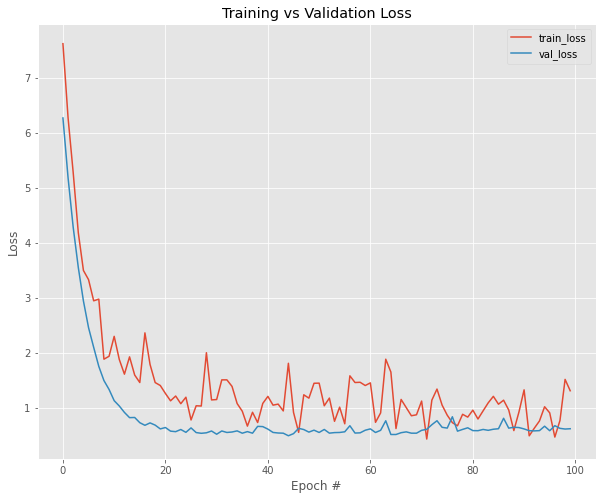

In [59]:
import matplotlib.pyplot as plt

epochs = np.arange(0, len(H.history['loss']))
plt.figure(figsize=(10,8))
plt.style.use('ggplot')

#plot training and validation loss
plt.style.use('ggplot')
plt.plot(epochs, H.history['loss'], label='train_loss')
plt.plot(epochs, H.history['val_loss'], label='val_loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

## **Early Stopping**

Early stopping is a technique that can avoid over-training and overfitting of the model. An over-trained model has a tedency to memorize all the training data points. With early stopping, a large arbritary number of traininig epochs is specified. The model is stopped from training further when the model performance stops improving on the validation dataset.

In [61]:
callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss',verbose=1,patience=5)

model = keras.Sequential([
    keras.layers.Dense(80, input_dim=60, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

H = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.3, callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',verbose=1,patience=5))

Epoch 1/100
14/14 [==============================] - 1s 15ms/step - loss: 7.0069 - accuracy: 0.5046 - val_loss: 6.3209 - val_accuracy: 0.6170
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 5.8188 - accuracy: 0.5413 - val_loss: 5.2418 - val_accuracy: 0.6170
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 4.8219 - accuracy: 0.6239 - val_loss: 4.3449 - val_accuracy: 0.6170
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 3.9930 - accuracy: 0.6422 - val_loss: 3.6088 - val_accuracy: 0.7021
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 3.3188 - accuracy: 0.6422 - val_loss: 3.0088 - val_accuracy: 0.5957
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 2.7767 - accuracy: 0.6697 - val_loss: 2.5203 - val_accuracy: 0.6809
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 2.3419 - accuracy: 0.6239 - val_loss: 2.1217 - val_accuracy: 0.6809
Epoch 8/100


In [62]:
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: ', acc*100)

2/2 [==============================] - 0s 3ms/step - loss: 0.6040 - accuracy: 0.7692
Test Accuracy:  76.92307829856873


In [63]:
loss, acc = model.evaluate(X_train, y_train)
print('Training Accuracy: ', acc*100)

5/5 [==============================] - 0s 1ms/step - loss: 0.5668 - accuracy: 0.8846
Training Accuracy:  88.46153616905212


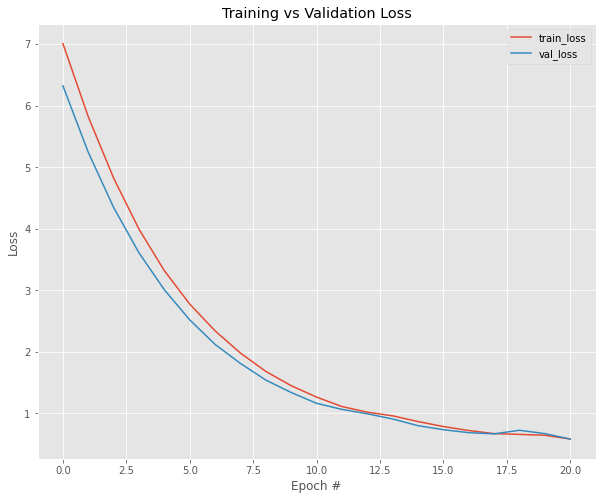

In [64]:
import matplotlib.pyplot as plt

epochs = np.arange(0, len(H.history['loss']))
plt.figure(figsize=(10,8))
plt.style.use('ggplot')
plt.plot(epochs, H.history['loss'], label='train_loss')
plt.plot(epochs, H.history['val_loss'], label='val_loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

## **ModelCheckpoint Callback**

A good application of checkpointing is to serialize your network to disk each time there is improvement during training. We define an 'improvement' to be eithera decrease in loss or an increase in accuracy - we'll set this parameter inside the actual Keras callback. <br>

ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval, so the mdoel or weights can be loaded later to continue the training from the state saved. <br>

A few options this callback provides include: <br>
1. Whether to only keep the model that has achieved the 'best performance' so far, or whether to save the model at the end of every epoch regardless of performance. <br>
2. Definition of 'best', which quantity to monitor and whether is should be maximized or minimized. <br>
3. The frequency it should save at. Currently, the callback supports saving at the end of every epoch, or after a fixed number of training batches. <br>
4. Whether only weights are saved, or the whole model is saved. 

In [65]:
from tensorflow.keras.callbacks import ModelCheckpoint

model = keras.Sequential([
    keras.layers.Dense(80, input_dim=60, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpoint = ModelCheckpoint('bestweights', monitor='val_loss', mode='min', save_best_only=True, verbose=1)
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',verbose=1,patience=5)
callbacks= [checkpoint,earlystopping]

H = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.3, callbacks=callbacks)

Epoch 1/100
 1/14 [=>............................] - ETA: 9s - loss: 0.7032 - accuracy: 0.3750
Epoch 1: val_loss improved from inf to 0.68993, saving model to bestweights


INFO:tensorflow:Assets written to: bestweights\assets


INFO:tensorflow:Assets written to: bestweights\assets


14/14 [==============================] - 2s 66ms/step - loss: 0.6915 - accuracy: 0.5505 - val_loss: 0.6899 - val_accuracy: 0.5319
Epoch 2/100
 1/14 [=>............................] - ETA: 0s - loss: 0.6675 - accuracy: 0.7500
Epoch 2: val_loss improved from 0.68993 to 0.68149, saving model to bestweights


INFO:tensorflow:Assets written to: bestweights\assets


INFO:tensorflow:Assets written to: bestweights\assets


14/14 [==============================] - 1s 51ms/step - loss: 0.6845 - accuracy: 0.5413 - val_loss: 0.6815 - val_accuracy: 0.5319
Epoch 3/100
 1/14 [=>............................] - ETA: 0s - loss: 0.6909 - accuracy: 0.5000
Epoch 3: val_loss improved from 0.68149 to 0.67318, saving model to bestweights


INFO:tensorflow:Assets written to: bestweights\assets


INFO:tensorflow:Assets written to: bestweights\assets


14/14 [==============================] - 1s 52ms/step - loss: 0.6776 - accuracy: 0.5413 - val_loss: 0.6732 - val_accuracy: 0.5319
Epoch 4/100
 1/14 [=>............................] - ETA: 0s - loss: 0.6841 - accuracy: 0.5000
Epoch 4: val_loss improved from 0.67318 to 0.66228, saving model to bestweights


INFO:tensorflow:Assets written to: bestweights\assets


INFO:tensorflow:Assets written to: bestweights\assets


14/14 [==============================] - 1s 52ms/step - loss: 0.6678 - accuracy: 0.6697 - val_loss: 0.6623 - val_accuracy: 0.5957
Epoch 5/100
 1/14 [=>............................] - ETA: 0s - loss: 0.6433 - accuracy: 0.6250
Epoch 5: val_loss improved from 0.66228 to 0.65147, saving model to bestweights


INFO:tensorflow:Assets written to: bestweights\assets


INFO:tensorflow:Assets written to: bestweights\assets


14/14 [==============================] - 1s 52ms/step - loss: 0.6602 - accuracy: 0.5688 - val_loss: 0.6515 - val_accuracy: 0.5745
Epoch 6/100
 1/14 [=>............................] - ETA: 0s - loss: 0.6228 - accuracy: 0.8750
Epoch 6: val_loss improved from 0.65147 to 0.63334, saving model to bestweights


INFO:tensorflow:Assets written to: bestweights\assets


INFO:tensorflow:Assets written to: bestweights\assets


14/14 [==============================] - 1s 77ms/step - loss: 0.6450 - accuracy: 0.6789 - val_loss: 0.6333 - val_accuracy: 0.7447
Epoch 7/100
 1/14 [=>............................] - ETA: 0s - loss: 0.6070 - accuracy: 0.7500
Epoch 7: val_loss improved from 0.63334 to 0.61928, saving model to bestweights


INFO:tensorflow:Assets written to: bestweights\assets


INFO:tensorflow:Assets written to: bestweights\assets


14/14 [==============================] - 1s 59ms/step - loss: 0.6283 - accuracy: 0.6789 - val_loss: 0.6193 - val_accuracy: 0.5745
Epoch 8/100
 1/14 [=>............................] - ETA: 0s - loss: 0.6278 - accuracy: 0.6250
Epoch 8: val_loss improved from 0.61928 to 0.59123, saving model to bestweights


INFO:tensorflow:Assets written to: bestweights\assets


INFO:tensorflow:Assets written to: bestweights\assets


14/14 [==============================] - 1s 60ms/step - loss: 0.6083 - accuracy: 0.6972 - val_loss: 0.5912 - val_accuracy: 0.8298
Epoch 9/100
 1/14 [=>............................] - ETA: 0s - loss: 0.5831 - accuracy: 0.8750
Epoch 9: val_loss improved from 0.59123 to 0.57385, saving model to bestweights


INFO:tensorflow:Assets written to: bestweights\assets


INFO:tensorflow:Assets written to: bestweights\assets


14/14 [==============================] - 1s 52ms/step - loss: 0.5824 - accuracy: 0.7523 - val_loss: 0.5739 - val_accuracy: 0.7234
Epoch 10/100
 1/14 [=>............................] - ETA: 0s - loss: 0.5851 - accuracy: 0.7500
Epoch 10: val_loss improved from 0.57385 to 0.54310, saving model to bestweights


INFO:tensorflow:Assets written to: bestweights\assets


INFO:tensorflow:Assets written to: bestweights\assets


14/14 [==============================] - 1s 56ms/step - loss: 0.5627 - accuracy: 0.7431 - val_loss: 0.5431 - val_accuracy: 0.8085
Epoch 11/100
 1/14 [=>............................] - ETA: 0s - loss: 0.7464 - accuracy: 0.1250
Epoch 11: val_loss improved from 0.54310 to 0.52464, saving model to bestweights


INFO:tensorflow:Assets written to: bestweights\assets


INFO:tensorflow:Assets written to: bestweights\assets


14/14 [==============================] - 1s 55ms/step - loss: 0.5381 - accuracy: 0.8165 - val_loss: 0.5246 - val_accuracy: 0.8085
Epoch 12/100
 1/14 [=>............................] - ETA: 0s - loss: 0.6815 - accuracy: 0.6250
Epoch 12: val_loss improved from 0.52464 to 0.50643, saving model to bestweights


INFO:tensorflow:Assets written to: bestweights\assets


INFO:tensorflow:Assets written to: bestweights\assets


14/14 [==============================] - 1s 54ms/step - loss: 0.5149 - accuracy: 0.8073 - val_loss: 0.5064 - val_accuracy: 0.8511
Epoch 13/100
 1/14 [=>............................] - ETA: 0s - loss: 0.5737 - accuracy: 0.7500
Epoch 13: val_loss improved from 0.50643 to 0.48626, saving model to bestweights


INFO:tensorflow:Assets written to: bestweights\assets


INFO:tensorflow:Assets written to: bestweights\assets


14/14 [==============================] - 1s 57ms/step - loss: 0.4923 - accuracy: 0.8073 - val_loss: 0.4863 - val_accuracy: 0.8298
Epoch 14/100
 1/14 [=>............................] - ETA: 0s - loss: 0.5072 - accuracy: 0.8750
Epoch 14: val_loss improved from 0.48626 to 0.47251, saving model to bestweights


INFO:tensorflow:Assets written to: bestweights\assets


INFO:tensorflow:Assets written to: bestweights\assets


14/14 [==============================] - 1s 54ms/step - loss: 0.4632 - accuracy: 0.8716 - val_loss: 0.4725 - val_accuracy: 0.8298
Epoch 15/100
 1/14 [=>............................] - ETA: 0s - loss: 0.4504 - accuracy: 0.8750
Epoch 15: val_loss improved from 0.47251 to 0.45978, saving model to bestweights


INFO:tensorflow:Assets written to: bestweights\assets


INFO:tensorflow:Assets written to: bestweights\assets


14/14 [==============================] - 1s 65ms/step - loss: 0.4457 - accuracy: 0.8257 - val_loss: 0.4598 - val_accuracy: 0.8298
Epoch 16/100
 1/14 [=>............................] - ETA: 0s - loss: 0.4046 - accuracy: 0.7500
Epoch 16: val_loss improved from 0.45978 to 0.44636, saving model to bestweights


INFO:tensorflow:Assets written to: bestweights\assets


INFO:tensorflow:Assets written to: bestweights\assets


14/14 [==============================] - 1s 50ms/step - loss: 0.4402 - accuracy: 0.8257 - val_loss: 0.4464 - val_accuracy: 0.8085
Epoch 17/100
 1/14 [=>............................] - ETA: 0s - loss: 0.3045 - accuracy: 0.8750
Epoch 17: val_loss did not improve from 0.44636
14/14 [==============================] - 0s 3ms/step - loss: 0.4073 - accuracy: 0.8716 - val_loss: 0.4629 - val_accuracy: 0.8298
Epoch 18/100
 1/14 [=>............................] - ETA: 0s - loss: 0.2888 - accuracy: 1.0000
Epoch 18: val_loss did not improve from 0.44636
14/14 [==============================] - 0s 4ms/step - loss: 0.3997 - accuracy: 0.8624 - val_loss: 0.4525 - val_accuracy: 0.8298
Epoch 19/100
 1/14 [=>............................] - ETA: 0s - loss: 0.2584 - accuracy: 0.8750
Epoch 19: val_loss did not improve from 0.44636
14/14 [==============================] - 0s 4ms/step - loss: 0.3548 - accuracy: 0.8807 - val_loss: 0.4496 - val_accuracy: 0.8511
Epoch 20/100
 1/14 [=>............................]

In [33]:
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: ', acc*100)

2/2 [==============================] - 0s 3ms/step - loss: 0.5419 - accuracy: 0.7885
Test Accuracy:  78.84615659713745


## **Load best weight**

In [66]:
model = keras.Sequential([
    keras.layers.Dense(80, input_dim=60, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.load_weights('bestweights')
print(model.evaluate(X_test,y_test))

2/2 [==============================] - 0s 3ms/step - loss: 0.4829 - accuracy: 0.7115
[0.4829402565956116, 0.7115384340286255]
